In [1]:
import Pkg
Pkg.activate(@__DIR__)
Pkg.status()

  Activating project at `~/Documents/Carnegie-Mellon/Chatterjee Group/Programming/heisenberg-model/Biquadratic.jl/analysis`


Status `~/Documents/Carnegie-Mellon/Chatterjee Group/Programming/heisenberg-model/Biquadratic.jl/analysis/Project.toml`
  [13f3f980] CairoMakie v0.15.3
  [780c37f4] Carlo v0.2.4
  [a93c6f00] DataFrames v1.7.0
  [f67ccb44] HDF5 v0.17.2


In [2]:
using CairoMakie
using Carlo.ResultTools
using DataFrames
using HDF5

In [3]:
# Parse DataFrame from ResultTools into more readily useable form
cleandata(filepath::AbstractString) = select(
    DataFrame(ResultTools.dataframe(filepath)),
    [:J1, :K, :Lx, :Ly, :Mag, :Energy, :Dx0, :Dy0],
)

cleandata (generic function with 1 method)

In [4]:
function generatePlot(data::AbstractDataFrame, x, y; fig=Figure(), fig_pos=(1,1),
                      title, xlabel, ylabel)
    fig[fig_pos...] = Axis(fig; title, xlabel, ylabel)

    vals = getfield.(data[:, y], :val)
    errs = getfield.(data[:, y], :err)
    scatter!(data[:, x], vals)
    errorbars!(data[:, x], vals, errs)

    return fig
end

function generatePlot(data::GroupedDataFrame, x, y; fig=Figure(), fig_pos=(1,1),
                      title, xlabel, ylabel)
    fig = Figure()
    fig[fig_pos...] = Axis(fig; title, xlabel, ylabel)

    for key in keys(data)
        group = data[key]
        vals = getfield.(group[:, y], :val)
        errs = getfield.(group[:, y], :err)
        scatter!(group[:, x], vals, label="$(NamedTuple(key))")
        errorbars!(group[:, x], vals, errs)
    end

    axislegend()

    return fig
end

generatePlot (generic function with 2 methods)

In [5]:
jobname = "j1-sweep"
data = groupby(cleandata("../jobs/" * jobname * ".results.json"), [:K])

Row,J1,K,Lx,Ly,Mag,Energy,Dx0,Dy0
,Float64,Float64,Int64,Int64,Measurem…,Measurem…,Measurem…,Measurem…
1,-2.0,0.2,40,40,0.21588±0.00098,-3.76417±0.00071,0.90036±0.00044,0.92726±0.00023
2,-1.9,0.2,40,40,0.0793±0.0011,-3.56923±0.00058,0.86226±0.00021,0.89071±0.00016
3,-1.8,0.2,40,40,0.09946±0.00088,-3.4053±0.00061,0.83265±0.00058,0.86069±0.00028
4,-1.7,0.2,40,40,0.101±0.001,-3.23884±0.00083,0.7735±0.00041,0.81062±0.00048
5,-1.6,0.2,40,40,0.107±0.0016,-3.07939±0.00061,0.73301±0.00024,0.78058±0.00036
6,-1.5,0.2,40,40,0.04474±0.00062,-2.93557±0.00094,0.70482±0.00018,0.73116±0.00073
7,-1.4,0.2,40,40,0.0354±0.0013,-2.79742±0.00055,0.64197±0.00053,0.68526±0.00046
8,-1.3,0.2,40,40,0.01095±0.00088,-2.6784±0.00057,0.5895±0.00093,0.64095±0.00072
9,-1.2,0.2,40,40,0.01397±0.0005,-2.5985±0.0011,0.52701±0.00023,0.59708±0.00072


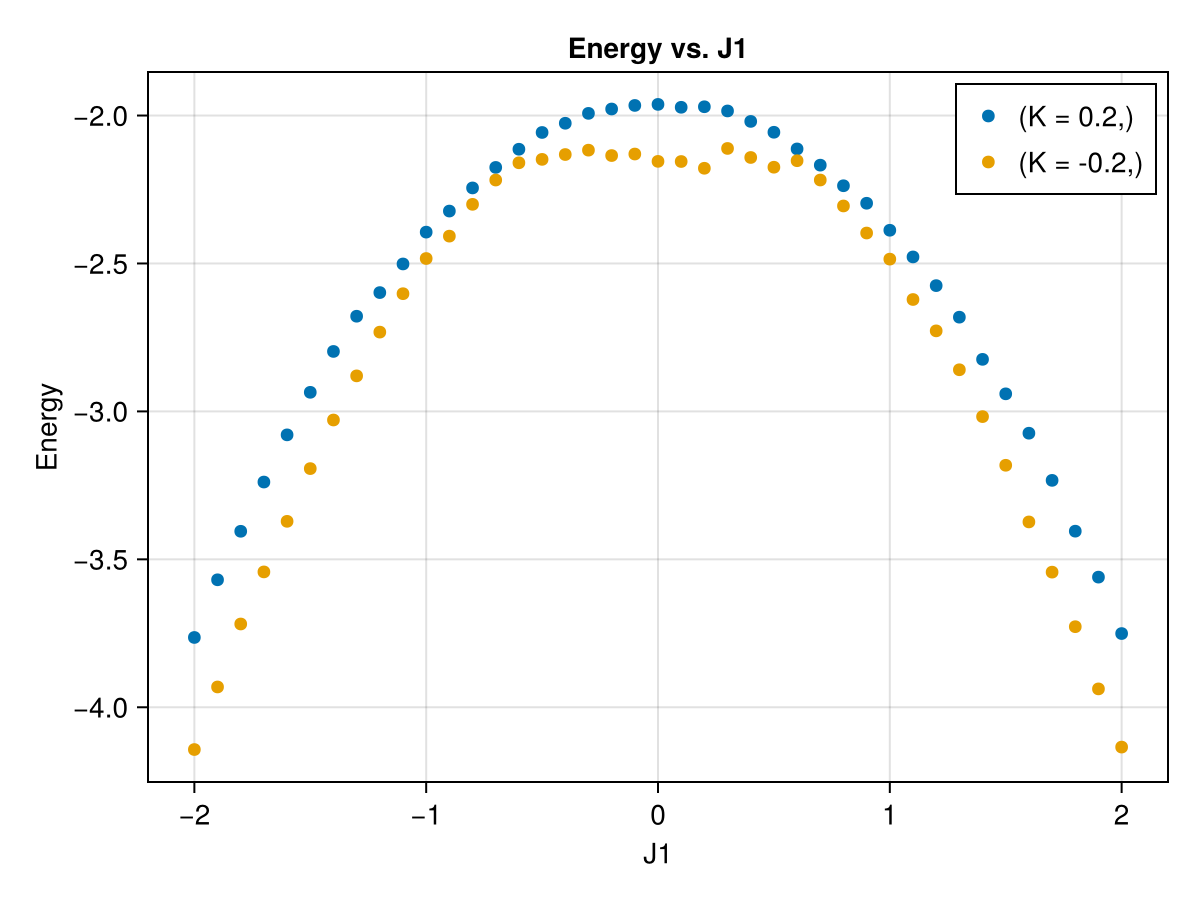

In [6]:
generatePlot(
    data, :J1, :Energy;
    title="Energy vs. J1",
    xlabel="J1",
    ylabel="Energy"
)

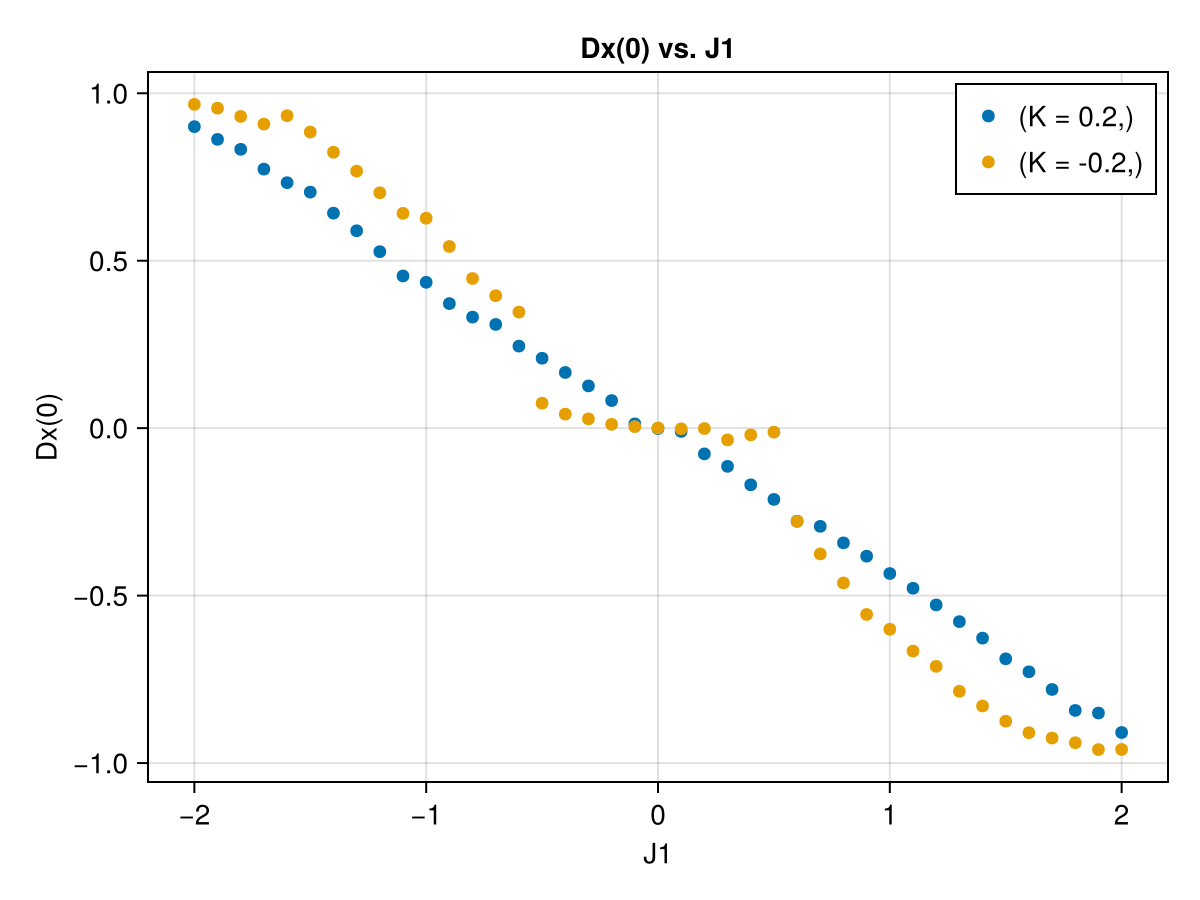

In [7]:
generatePlot(
    data, :J1, :Dx0;
    title="Dx(0) vs. J1",
    xlabel="J1",
    ylabel="Dx(0)"
)

In [8]:
jobname = "j1-fine-sweep"
fine_data = groupby(cleandata("../jobs/" * jobname * ".results.json"), [:K])

Row,J1,K,Lx,Ly,Mag,Energy,Dx0,Dy0
,Float64,Float64,Int64,Int64,Measurem…,Measurem…,Measurem…,Measurem…
1,-1.0,0.2,40,40,0.00596±0.00042,-2.39594±0.00094,0.43149±0.00052,0.484±0.0016
2,-0.95,0.2,40,40,0.00804±0.00044,-2.35436±0.00036,0.41856±0.00035,0.49221±0.00027
3,-0.9,0.2,40,40,0.00631±0.00038,-2.32377±0.00029,0.32796±0.0003,0.43944±0.00025
4,-0.85,0.2,40,40,0.00728±0.00036,-2.2691±0.0018,0.33775±0.00047,0.39901±0.00032
5,-0.8,0.2,40,40,0.00602±0.00018,-2.23836±0.00047,0.32819±0.0004,0.37996±0.00025
6,-0.75,0.2,40,40,0.00319±0.00023,-2.20416±0.00041,0.3231±0.00016,0.3608±0.0012
7,-0.7,0.2,40,40,0.00822±0.0004,-2.16171±0.00032,0.29236±0.0003,0.37055±0.00033
8,-0.65,0.2,40,40,0.00616±0.00038,-2.12171±0.00046,0.28682±0.00082,0.31969±0.00067
9,-0.6,0.2,40,40,0.00269±0.00019,-2.13657±0.00036,0.29991±0.0006,0.30213±0.00033


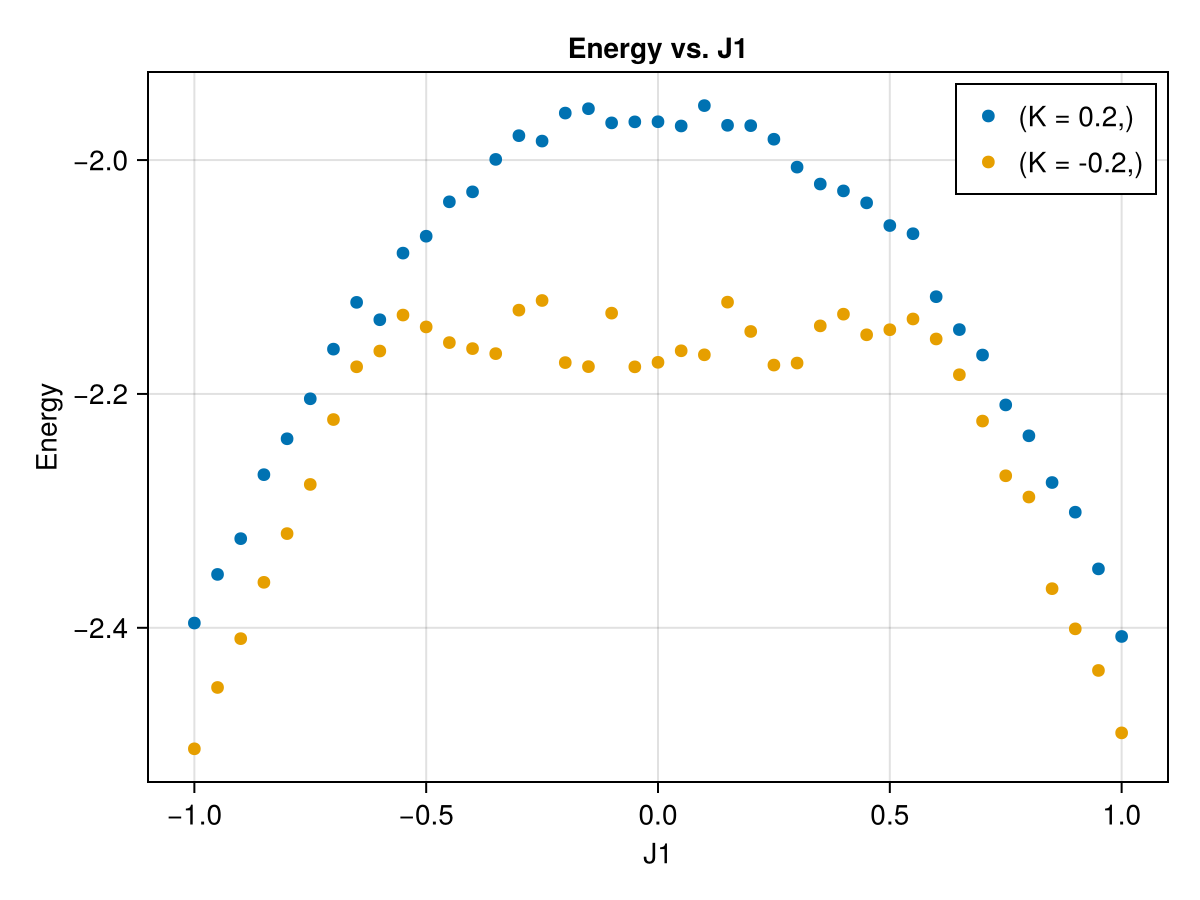

In [9]:
fig = generatePlot(
    fine_data, :J1, :Energy;
    title="Energy vs. J1",
    xlabel="J1",
    ylabel="Energy"
)
save("j1-energy.png", fig)
fig

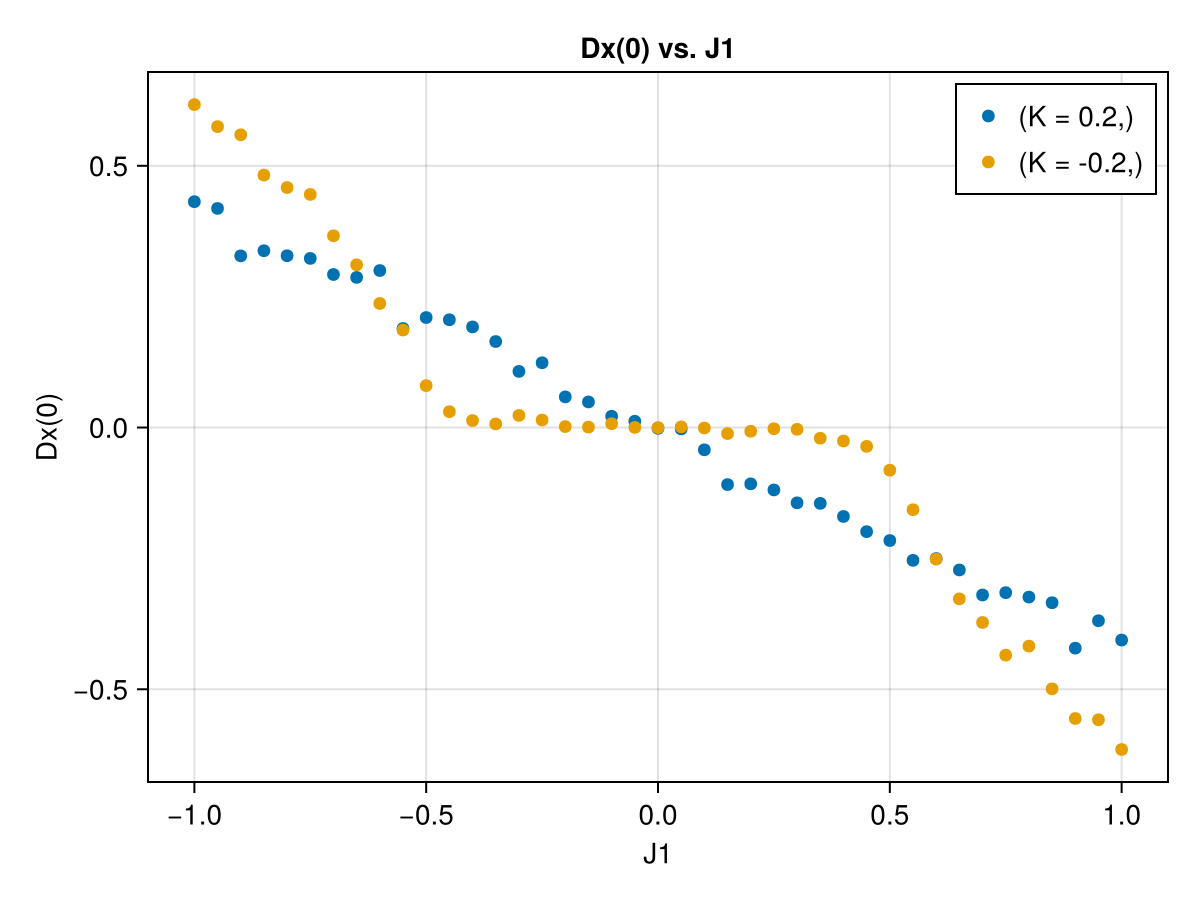

In [10]:
fig = generatePlot(
    fine_data, :J1, :Dx0;
    title="Dx(0) vs. J1",
    xlabel="J1",
    ylabel="Dx(0)"
)
save("j1-Dx0.png", fig)
fig

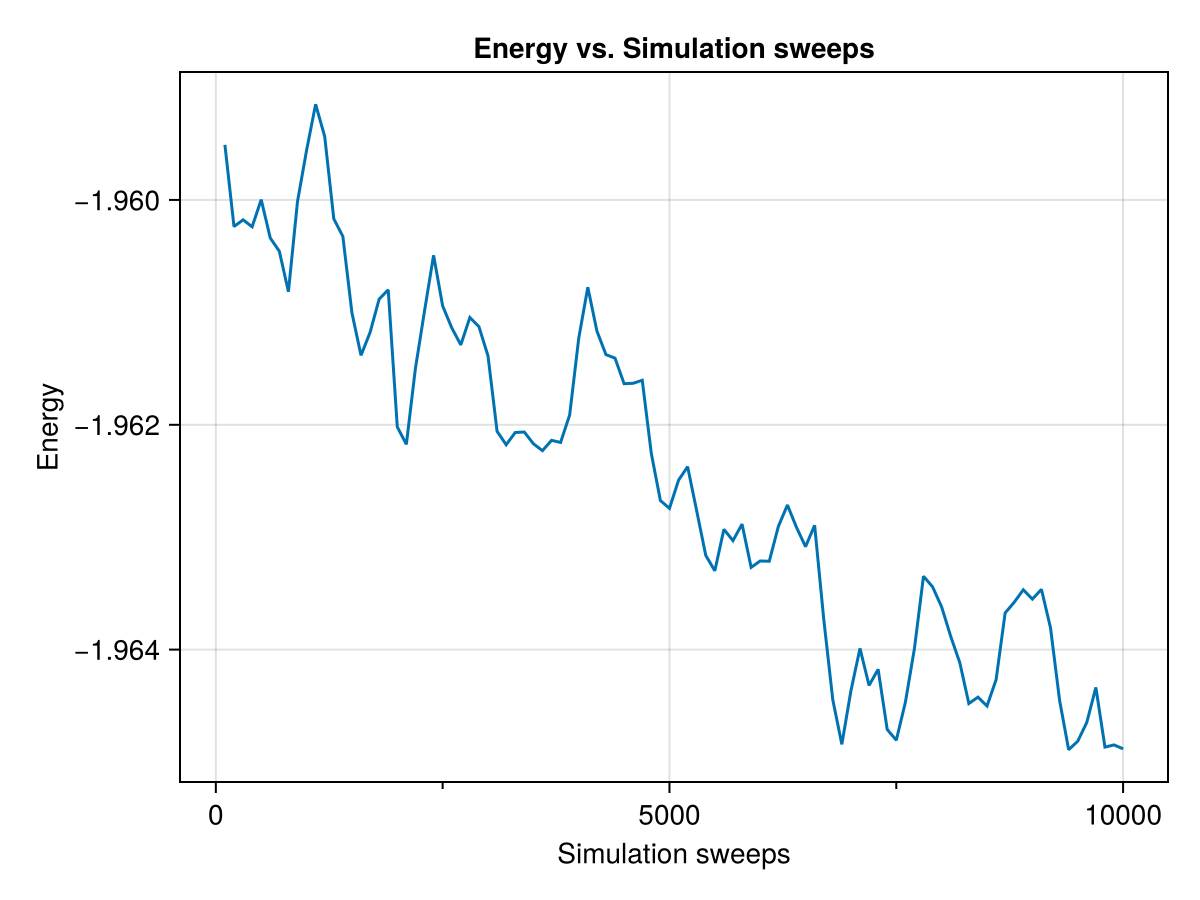

In [14]:
fig = Figure()

ax = fig[1,1] = Axis(
    fig,
    title="Energy vs. Simulation sweeps",
    xlabel="Simulation sweeps",
    ylabel="Energy",
    xminorticksvisible=true
)

task_no = "41"
h5open("../jobs/j1-sweep.data/task00" * task_no * "/run0001.meas.h5") do file
    mag_group = file["observables/Energy"]
    mag_samples = read(mag_group, "samples")
    bin_len = read(mag_group, "bin_length")
    lines!(
        bin_len .* collect(1:length(mag_samples)),
        mag_samples,
        label="T = 2.2435698905536414"
    )
end

fig